In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text
import numpy as np
import pickle
import polars as pl
from matplotlib import pyplot as pt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
file = pl.read_csv("C:/Users/thegr/OneDrive/Desktop/MLMiniProject/data/preprocessedData.csv")
file.head(3)

temp,feelsLike,pressure,humidity,clouds,windSpeed,windDir,gustSpeed,result
f64,f64,f64,f64,f64,f64,f64,f64,i64
25.3,25.8,982.0,74.0,25.0,3.04,242.0,4.0,0
25.3,25.9,982.0,74.0,25.0,2.38,232.0,3.0,0
26.0,26.5,983.0,71.0,25.0,3.02,241.0,3.02,0


In [85]:
x = file.drop('result')
y = file['result']

In [86]:
x_train, x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [87]:
randomForestClassifier = RandomForestClassifier(n_estimators=99, random_state=99)
randomForestClassifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=99, random_state=99)

In [88]:
predict = randomForestClassifier.predict(x_test)

In [89]:
accuracy = accuracy_score(predict, y_test)
confusion_matrix = confusion_matrix(predict, y_test)

print(f'Accuracy_score: {accuracy}')
print(f'\nConfusion Matrix: \n {confusion_matrix}')

Accuracy_score: 0.9032509752925878

Confusion Matrix: 
 [[3454  353]
 [  19   19]]


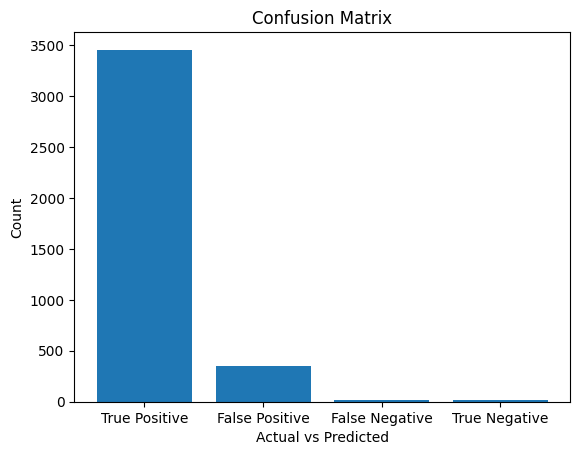

In [90]:
labels = np.array(['True Positive', 'False Positive', 'False Negative', 'True Negative'])
values = np.array([confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]])

pt.bar(labels, values)
pt.xlabel("Actual vs Predicted")
pt.ylabel("Count")
pt.title("Confusion Matrix")
pt.show()

In [47]:
for i in range(0, 99):
  estimator = randomForestClassifier.estimators_[i]
  tree_rules = export_text(estimator, feature_names=list(x.columns))
  with open("trueRules.txt", 'a') as file:
    file.write(f"Tree {i+1} Rules: \n\n")
    file.write(tree_rules + "\n\n\n")

In [48]:
with open("model.pickle", 'wb') as file:
  pickle.dump(randomForestClassifier, file)